# Phishing Url Detection

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('dataset_phishing.csv')

In [ ]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
dataset.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
dataset['status'].replace(['legitimate','phishing'],[1,0],inplace=True)

In [ ]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [ ]:
dataset.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
X = dataset[['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
        'nb_qm', 'nb_eq', 'nb_underscore', 'nb_slash', 'nb_www', 'https_token', 'ratio_digits_url',
       'ratio_digits_host',  'nb_subdomains',
        'nb_redirection', 'nb_hyperlinks', 'domain_age',
         'google_index']]

In [ ]:
y = dataset['status'].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train1 = X_train

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.58209766  0.06930983 -0.4196155  ... -0.10640837  1.25527695
  -1.07309338]
 [ 0.18149079  0.16027712 -0.4196155  ... -0.29171174 -1.05816028
   0.93188535]
 [-0.79746876 -0.74939578 -0.4196155  ...  1.37004109  1.121314
  -1.07309338]
 ...
 [ 0.31854513 -1.20423224 -0.4196155  ... -0.51885781  0.59995335
   0.93188535]
 [-0.24925141 -0.11262475 -0.4196155  ... -0.50092523 -0.30204243
   0.93188535]
 [-0.2688306   0.06930983 -0.4196155  ... -0.51885781 -1.3090188
   0.93188535]]


In [ ]:
print(X_test)

[[-0.52336008  0.3422117  -0.4196155  ...  0.6288276   0.69430707
  -1.07309338]
 [-0.13177626 -0.84036307 -0.4196155  ... -0.44712748 -1.3090188
   0.93188535]
 [-0.6995728  -0.65842849 -0.4196155  ... -0.51885781 -0.73548988
  -1.07309338]
 ...
 [ 0.04443646  0.16027712 -0.4196155  ...  0.34190625  1.40759541
   0.93188535]
 [-0.34714736 -0.20359204 -0.4196155  ... -0.44712748  1.48037337
   0.93188535]
 [-0.64083523 -0.20359204 -0.4196155  ... -0.3036668  -0.09111518
  -1.07309338]]


## Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier_svm.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1060   71]
 [  77 1078]]


0.9352580927384077

# K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kn = KNeighborsClassifier()
classifier_kn.fit(X_train,y_train)

KNeighborsClassifier()

# Predicting the Test set results

In [ ]:
y_pred = classifier_kn.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1060   71]
 [  87 1068]]


0.9308836395450568

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train,y_train)

GaussianNB()

# Predicting the Test set results

In [ ]:
y_pred = classifier_nb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 688  443]
 [  89 1066]]


0.7672790901137357

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators= 30, criterion='entropy', random_state=0)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

# Predicting the Test set results

In [ ]:
y_pred = classifier_rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


Importance of different features

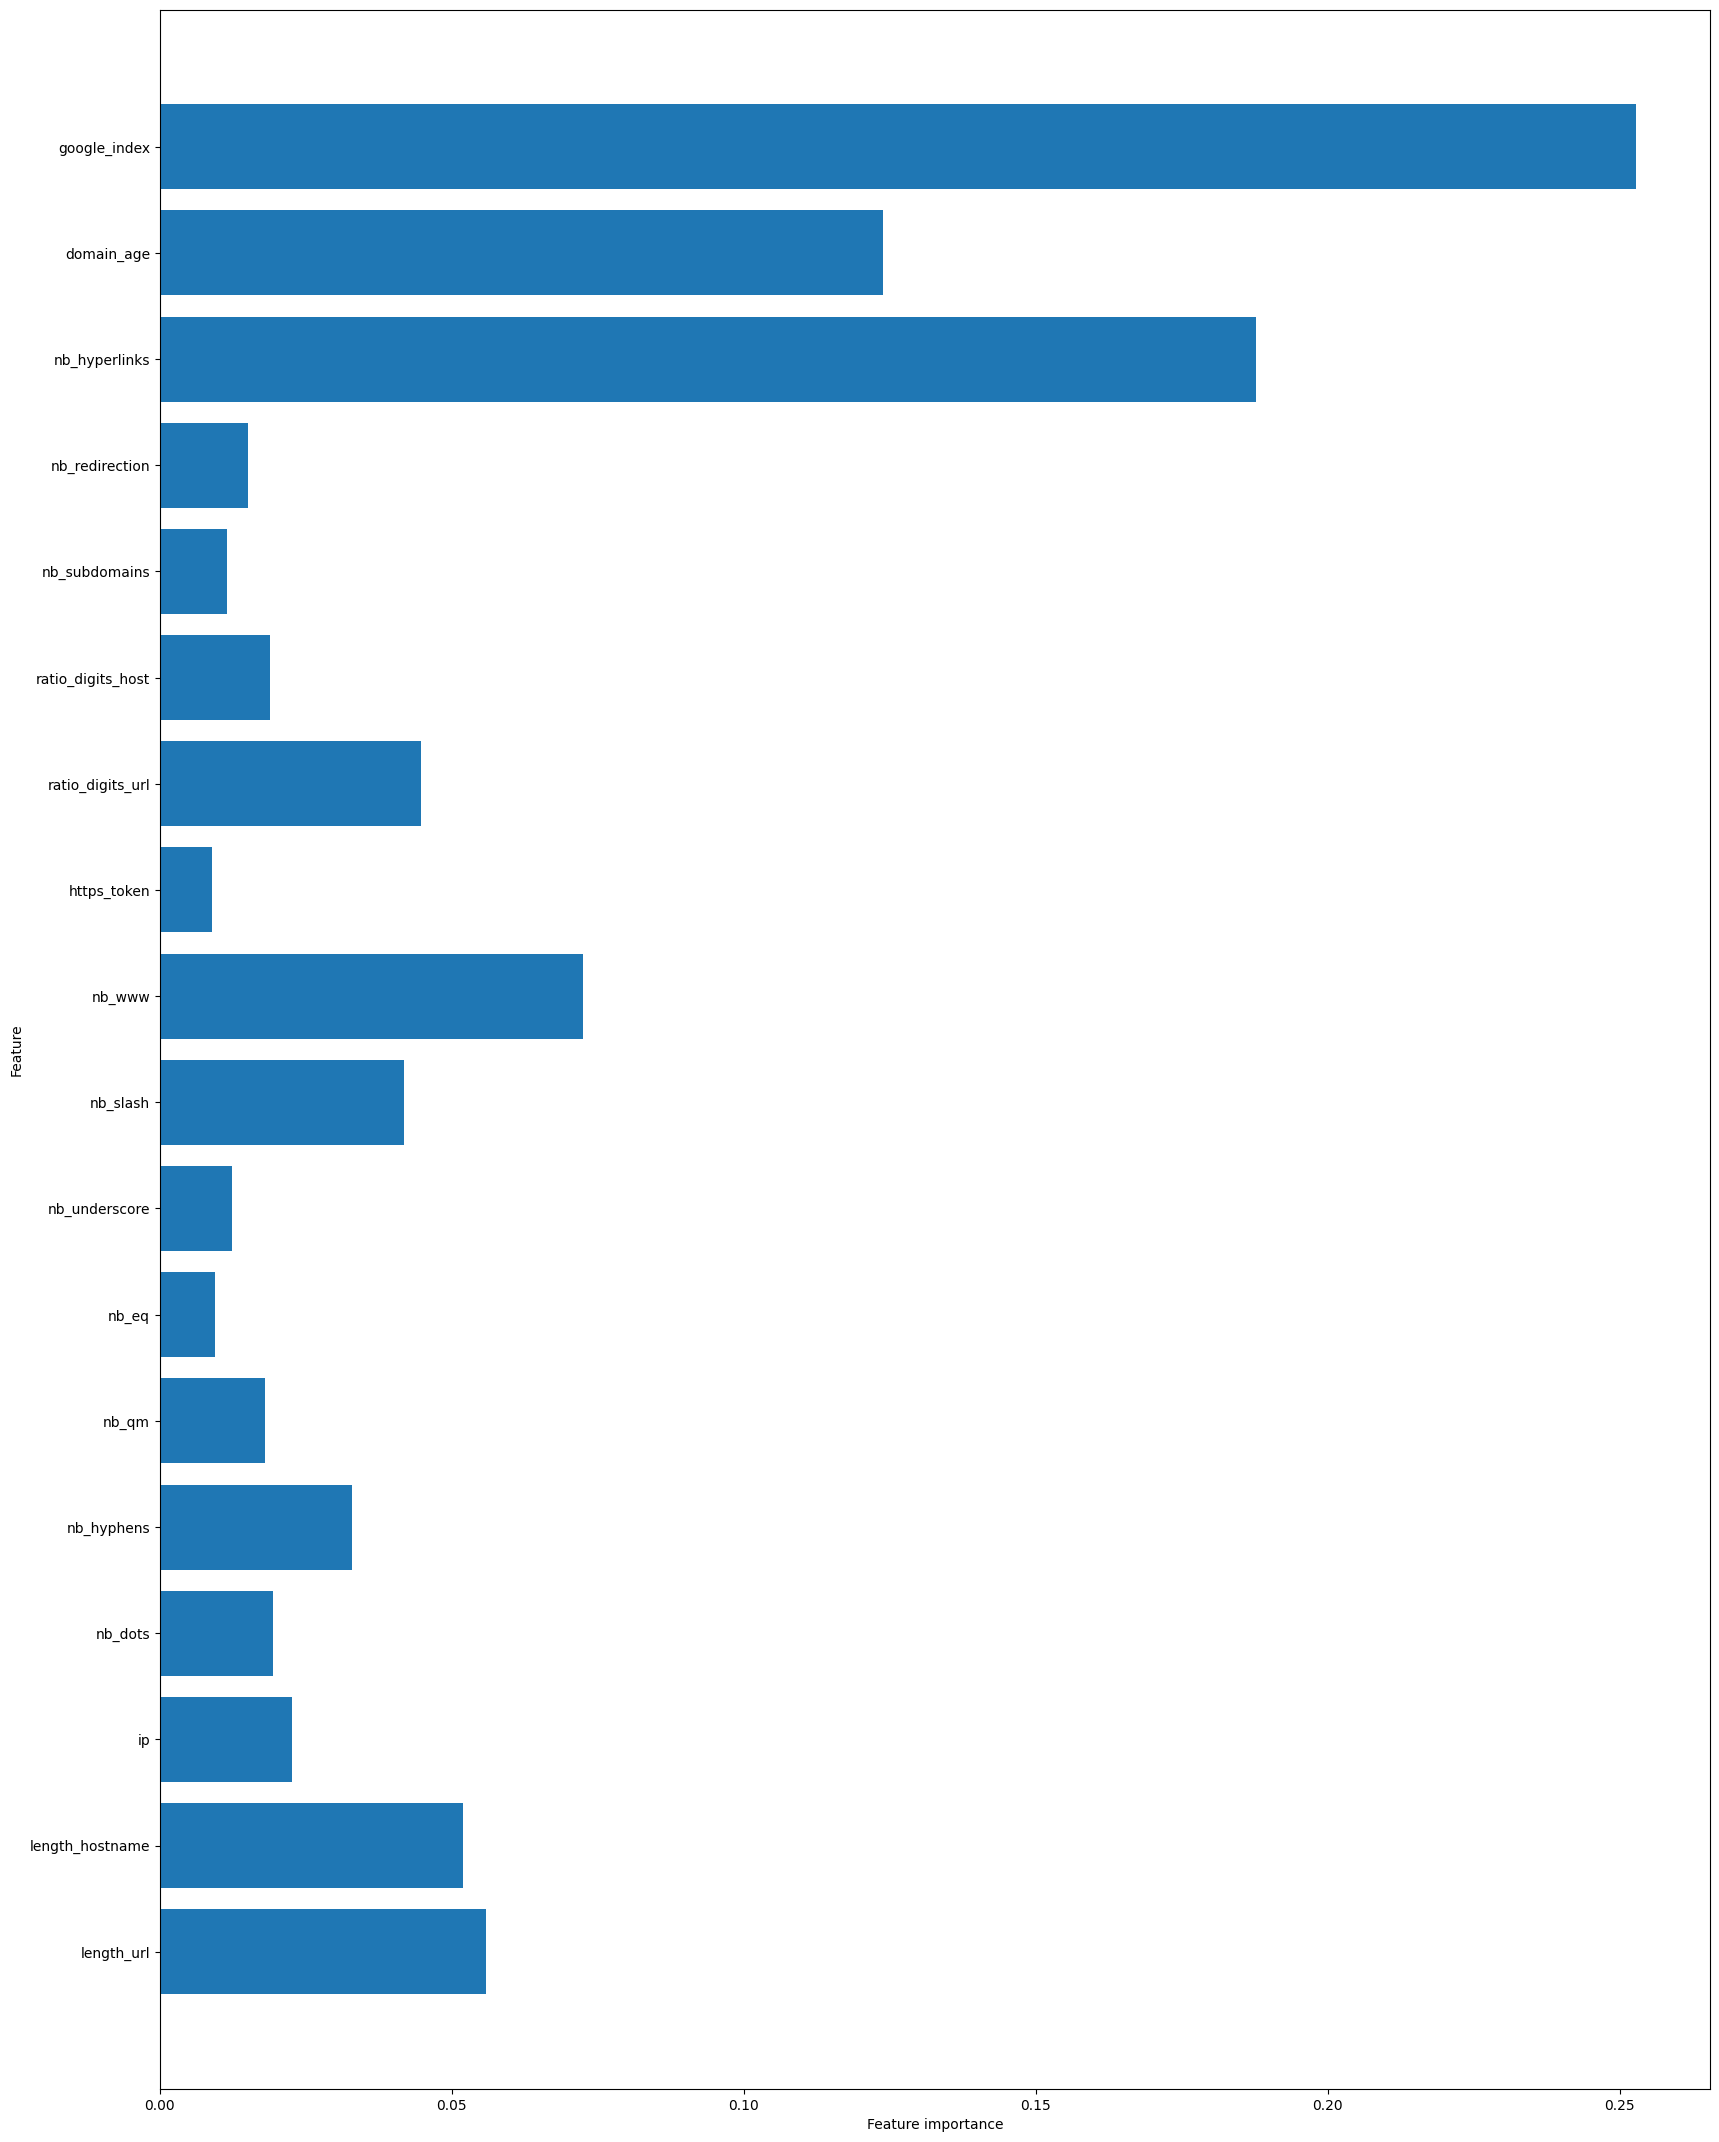

In [ ]:
plt.figure(figsize=(20,27))
n_features = X_train.shape[1]
plt.barh(range(n_features), classifier_rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train1.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1075   56]
 [  57 1098]]


0.9505686789151356

# Extracting features from a url

# Importing Libraries

In [ ]:
!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from urllib.parse import urlencode, urlparse
import ipaddress
import re
import requests
import whois
import datetime
from bs4 import BeautifulSoup

In [372]:
url = "https://scikit-learn.org/stable/"

features = []

# URL related features

1.   length of url
2.   length of hostname
3.   IP in url




In [373]:
def length_url(url):
  features.append(len(url))
  parsed_url = urlparse(url)
  features.append(len(parsed_url.hostname))
  #checking for ip in a given url
  domain = parsed_url.netloc
  try:
    ipaddress.ip_address(domain)
    ip = 1
  except:
    ip = 0
  features.append(ip)

length_url(url)
print(features)

[32, 16, 0]


4. no of dots
5. no of hyphen
6. no of questionmark
7. no of equals
8. no of underscore
9. no of slash
10. no of www present

In [374]:
def prop(url):
  dot_count = 0
  hypen_count = 0
  question_count = 0
  equal_count = 0
  underscore_count = 0
  slash_count = 0
  for char in url:
    if char == '.':
      dot_count += 1
    elif char == '-':
      hypen_count += 1
    elif char == '?':
      question_count += 1
    elif char == '=':
      equal_count += 1
    elif char == '_':
      underscore_count += 1
    elif char == '/':
      slash_count += 1
  features.append(dot_count)
  features.append(hypen_count)
  features.append(question_count)
  features.append(equal_count)
  features.append(underscore_count)
  features.append(slash_count)
  www_count = url.count("www")
  features.append(www_count)

prop(url)
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0]


# Protocol used

11. weather https used or not

In [375]:
def https(url):
  if url.startswith("https://"):
    features.append(0)
  else:
    features.append(1)

https(url)
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0]


12. Ratio of digits in the url

In [376]:
def calculate_digits_ratio_url(url):
    total_digits = 0
    for char in url:
        if char.isdigit():
            total_digits += 1
    
    total_chars = len(url)

    if total_chars == 0:
        return 0
    
    digits_ratio = total_digits / total_chars
    return digits_ratio

r_url = calculate_digits_ratio_url(url)
features.append(r_url)
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0.0]


13. Ratio of digits in the host

In [377]:
def calculate_digits_ratio_host(url):
    parsed_url = urlparse(url)
    host = parsed_url.netloc
    total_digits = 0
    
    for char in url:
        if char.isdigit():
            total_digits += 1

    total_chars = len(host)

    if total_chars == 0:
        return 0
    
    digits_ratio = total_digits / total_chars
    return digits_ratio

r_host = calculate_digits_ratio_host(url)
features.append(r_host)
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0.0, 0.0]


14. no of subdomain

In [378]:
def count_subdomains(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    
    if hostname:
        subdomains = hostname.split('.')
        return len(subdomains)
    
    return 0

sub_domain = count_subdomains(url)
features.append(sub_domain)
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0.0, 0.0, 2]


15. no of redirections

In [379]:
def count_redirections(url):
    response = requests.get(url, allow_redirects=True)
    redirections = len(response.history)
    
    return redirections

features.append(count_redirections(url))
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0.0, 0.0, 2, 0]


16. no of hyperlinks

In [380]:
def count_hyperlinks(url):
    # Send a GET request to the URL and retrieve the HTML content
    response = requests.get(url)
    html_content = response.text

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find all anchor tags in the HTML and count the number of occurrences
    hyperlink_count = len(soup.find_all('a'))

    return hyperlink_count

features.append(count_hyperlinks(url))

17. domain age

In [381]:
def calculate_domain_age(url):
    domain = urlparse(url).netloc
    if domain:
        try:
            w = whois.whois(domain)
            creation_date = w.creation_date
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            age = (datetime.datetime.now() - creation_date).days
            return age
        except:
            pass
    return -1

features.append(calculate_domain_age(url))
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0.0, 0.0, 2, 0, 120, 4224]


18. google index

In [382]:
def is_indexed_by_google(url):
    search_url = f"https://www.google.com/search?q={url}"
    response = requests.get(search_url)
    
    if response.status_code == 200 and url in response.text:
        return 0
    
    return 1

features.append(is_indexed_by_google(url))
print(features)

[32, 16, 0, 1, 1, 0, 0, 0, 4, 0, 0, 0.0, 0.0, 2, 0, 120, 4224, 0]


# Feature Scalling the input list

In [383]:
X_pred = sc.transform([features])
print(X_pred)

[[-5.62518465e-01 -4.76493911e-01 -4.19615503e-01 -1.10206698e+00
   7.30136075e-04 -3.91792409e-01 -3.05434806e-01 -3.00702045e-01
  -1.49332292e-01 -8.93719418e-01 -1.25241340e+00 -5.92996021e-01
  -2.66093354e-01 -3.74137308e-01 -7.18317387e-01  1.98445569e-01
   5.15424922e-02 -1.07309338e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# OUTPUT

Phishing is 0

Legitimate is 1

KNN classifier prediction

In [384]:
out = classifier_kn.predict(X_pred)
print(out)

[1]


SVM classifier prediction

In [385]:
out = classifier_svm.predict(X_pred)
print(out)

[1]


Naive basyes classifier prediction

In [386]:
out = classifier_nb.predict(X_pred)
print(out)

[1]


Random Forest Classifier Prediction

In [387]:
out = classifier_rf.predict(X_pred)
print(out)
if out[0] == 0:
  print("PHISHING")
else:
  print("legitimate")

[1]
legitimate
